# Logistic regression model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import joblib

#### Importing training and testing sets

In [2]:
X_train = joblib.load('X_train.joblib')
X_test = joblib.load('X_test.joblib')
y_train = joblib.load('y_train.joblib')
y_test = joblib.load('y_test.joblib')

In [3]:
X_train

,BNUM_OUT,BNUM_IN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment 1,Segment 2,Segment 3,Segment 5
0,0.548670,0.618258,-0.791595,0.0,-0.737565,1.803933,-1.056235,-0.555267,1.516427,-0.429513,-0.663266
1,0.548670,0.713341,-0.349134,0.0,-0.117997,1.803933,0.692729,-0.555267,1.516427,-0.429513,-0.663266
2,1.817986,2.044500,2.305630,0.0,1.947230,-0.637988,1.310010,-0.555267,1.516427,-0.429513,-0.663266
3,1.471809,0.428092,-0.791595,0.0,-0.737565,1.803933,-1.159116,-0.555267,1.516427,-0.429513,-0.663266
4,2.164163,2.044500,-0.349134,0.0,0.501571,1.803933,1.447184,-0.555267,1.516427,-0.429513,-0.663266
...,...,...,...,...,...,...,...,...,...,...,...
3674,0.317886,0.998589,0.535788,0.0,0.914616,-0.237673,-1.124822,-0.555267,1.516427,-0.429513,-0.663266
3675,-0.720645,-0.617819,-0.349134,0.0,-0.737565,-0.718051,-0.473247,-0.555267,-0.659445,-0.429513,1.507691
3676,-0.836038,0.142844,-0.349134,0.0,-0.737565,-0.718051,-1.021942,-0.555267,-0.659445,-0.429513,1.507691
3677,2.164163,2.044500,-0.791595,0.0,-0.737565,1.803933,-0.679008,-0.555267,1.516427,-0.429513,-0.663266


In [4]:
X_train.isna().sum().sort_values(ascending = False)

BNUM_OUT                0
BNUM_IN                 0
REV_OUT                 0
USAGE_OUT_INT_DUR       0
USAGE_OUT_OFFNET_DUR    0
USAGE_OUT_ONNET_DUR     0
LNE_TENURE              0
Segment 1               0
Segment 2               0
Segment 3               0
Segment 5               0
dtype: int64

###### Preview of training data

In [5]:
X_train.describe()

,BNUM_OUT,BNUM_IN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment 1,Segment 2,Segment 3,Segment 5
count,3.679000e+03,3.679000e+03,3.679000e+03,3679.0,3.679000e+03,3.679000e+03,3.679000e+03,3.679000e+03,3.679000e+03,3.679000e+03,3.679000e+03
mean,6.083745e-17,3.862695e-17,1.762355e-17,0.0,4.248964e-17,-3.862695e-17,1.245719e-16,-5.794042e-17,3.379858e-17,4.924936e-17,9.463603e-17
std,1.000136e+00,1.000136e+00,1.000136e+00,0.0,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00
min,-9.514300e-01,-1.093233e+00,-7.915945e-01,0.0,-7.375648e-01,-7.180514e-01,-1.364876e+00,-5.552670e-01,-6.594448e-01,-4.295133e-01,-6.632660e-01
25%,-8.360376e-01,-8.079842e-01,-7.915945e-01,0.0,-7.375648e-01,-7.180514e-01,-9.533552e-01,-5.552670e-01,-6.594448e-01,-4.295133e-01,-6.632660e-01
50%,-3.744683e-01,-3.325701e-01,-3.491338e-01,0.0,-5.310422e-01,-5.979569e-01,-2.331934e-01,-5.552670e-01,-6.594448e-01,-4.295133e-01,-6.632660e-01
75%,5.486703e-01,6.182579e-01,5.357875e-01,0.0,5.015710e-01,5.629564e-01,9.670763e-01,-5.552670e-01,1.516427e+00,-4.295133e-01,1.507691e+00
max,2.164163e+00,2.044500e+00,2.305630e+00,0.0,1.947230e+00,1.803933e+00,1.481478e+00,1.800935e+00,1.516427e+00,2.328217e+00,1.507691e+00


#### Finding the categorical variables

In [7]:
categorical = [var for var in X_train.columns if X_train[var].dtype == 'O']
print('There are {} categorical variables'.format(len(categorical)))
print('Categorical variables are: ', categorical)

There are 0 categorical variables
Categorical variables are:  []


#### Finding the categorical variables

In [9]:
numerical = [var for var in X_train.columns if X_train[var].dtype != 'O']
print('There are {} numerical variables'.format(len(numerical)))
print('Numerical variables are: ', numerical)

There are 11 numerical variables
Numerical variables are:  ['BNUM_OUT', 'BNUM_IN', 'REV_OUT', 'USAGE_OUT_INT_DUR', 'USAGE_OUT_OFFNET_DUR', 'USAGE_OUT_ONNET_DUR', 'LNE_TENURE', 'Segment 1', 'Segment 2', 'Segment 3', 'Segment 5']


In [11]:
X_train[numerical].head()

,BNUM_OUT,BNUM_IN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment 1,Segment 2,Segment 3,Segment 5
0,0.548670,0.618258,-0.791595,0.0,-0.737565,1.803933,-1.056235,-0.555267,1.516427,-0.429513,-0.663266
1,0.548670,0.713341,-0.349134,0.0,-0.117997,1.803933,0.692729,-0.555267,1.516427,-0.429513,-0.663266
2,1.817986,2.044500,2.305630,0.0,1.947230,-0.637988,1.310010,-0.555267,1.516427,-0.429513,-0.663266
3,1.471809,0.428092,-0.791595,0.0,-0.737565,1.803933,-1.159116,-0.555267,1.516427,-0.429513,-0.663266
4,2.164163,2.044500,-0.349134,0.0,0.501571,1.803933,1.447184,-0.555267,1.516427,-0.429513,-0.663266


In [12]:
X_train[numerical].isnull().sum().sort_values(ascending = False)

BNUM_OUT                0
BNUM_IN                 0
REV_OUT                 0
USAGE_OUT_INT_DUR       0
USAGE_OUT_OFFNET_DUR    0
USAGE_OUT_ONNET_DUR     0
LNE_TENURE              0
Segment 1               0
Segment 2               0
Segment 3               0
Segment 5               0
dtype: int64

###### Summary statistics in the numerical variables

In [62]:
print(round(X_train[numerical].describe()),2)

       BNUM_OUT  BNUM_IN  REV_OUT  USAGE_OUT_INT_DUR  USAGE_OUT_OFFNET_DUR  \
count    3679.0   3679.0   3679.0             3679.0                3679.0   
mean        0.0      0.0      0.0                0.0                   0.0   
std         1.0      1.0      1.0                0.0                   1.0   
min        -1.0     -1.0     -1.0                0.0                  -1.0   
25%        -1.0     -1.0     -1.0                0.0                  -1.0   
50%        -0.0     -0.0     -0.0                0.0                  -1.0   
75%         1.0      1.0      1.0                0.0                   1.0   
max         2.0      2.0      2.0                0.0                   2.0   

       USAGE_OUT_ONNET_DUR  LNE_TENURE  Segment 1  Segment 2  Segment 3  \
count               3679.0      3679.0     3679.0     3679.0     3679.0   
mean                  -0.0         0.0       -0.0        0.0        0.0   
std                    1.0         1.0        1.0        1.0        1.0 

Text(0, 0.5, 'Number of outgoing minutes in the network')

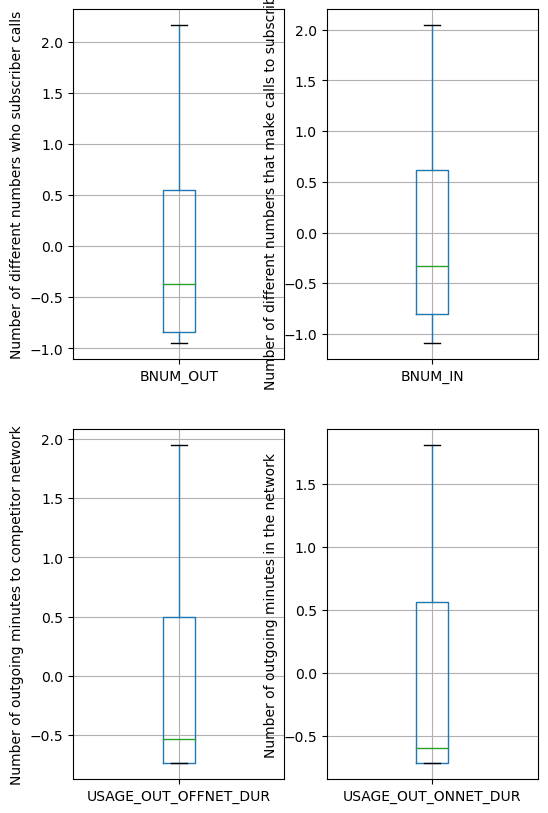

In [15]:
# boxplots for visualising outliers
plt.figure(figsize=(6,10))

plt.subplot(2, 2, 1)
fig = X_train.boxplot(column='BNUM_OUT')
fig.set_title('')
fig.set_ylabel('Number of different numbers who subscriber calls')


plt.subplot(2, 2, 2)
fig = X_train.boxplot(column='BNUM_IN')
fig.set_title('')
fig.set_ylabel('Number of different numbers that make calls to subscriber')


plt.subplot(2, 2, 3)
fig = X_train.boxplot(column='USAGE_OUT_OFFNET_DUR')
fig.set_title('')
fig.set_ylabel('Number of outgoing minutes to competitor network')


plt.subplot(2, 2, 4)
fig = X_train.boxplot(column='USAGE_OUT_ONNET_DUR')
fig.set_title('')
fig.set_ylabel('Number of outgoing minutes in the network')

In [19]:
y_train.value_counts()/len(X_train) * 100
# inbalanced data set

CHURN
0    76.35227
1    23.64773
Name: count, dtype: float64

##### Examining linear correlation between variables and variable CHURN

In [24]:
import warnings
from scipy import stats
warnings.filterwarnings("ignore", category=UserWarning, module="numpy.lib.function_base")
warnings.filterwarnings("ignore", category=stats.ConstantInputWarning)

In [25]:
from scipy.stats import pointbiserialr
for column in X_train.columns:
    if column != 'CHURN' and column != 'Segment':
        corr, p_value = pointbiserialr(y_train, X_train[column])
        print(f"Point-Biserial correlation between CHURN and {column}: {corr: .2f}")
        print(f"P-value: {p_value: .4f}")

# there are statistically important linear correlations between numerical independent variables and dependent variable CHURN

Point-Biserial correlation between CHURN and BNUM_OUT: -0.27
P-value:  0.0000
Point-Biserial correlation between CHURN and BNUM_IN: -0.35
P-value:  0.0000
Point-Biserial correlation between CHURN and REV_OUT: -0.18
P-value:  0.0000
Point-Biserial correlation between CHURN and USAGE_OUT_INT_DUR:  nan
P-value:  nan
Point-Biserial correlation between CHURN and USAGE_OUT_OFFNET_DUR: -0.19
P-value:  0.0000
Point-Biserial correlation between CHURN and USAGE_OUT_ONNET_DUR: -0.21
P-value:  0.0000
Point-Biserial correlation between CHURN and LNE_TENURE: -0.07
P-value:  0.0001
Point-Biserial correlation between CHURN and Segment 1:  1.00
P-value:  0.0000
Point-Biserial correlation between CHURN and Segment 2: -0.37
P-value:  0.0000
Point-Biserial correlation between CHURN and Segment 3: -0.24
P-value:  0.0000
Point-Biserial correlation between CHURN and Segment 5: -0.37
P-value:  0.0000


###### Checking for multicollinearity

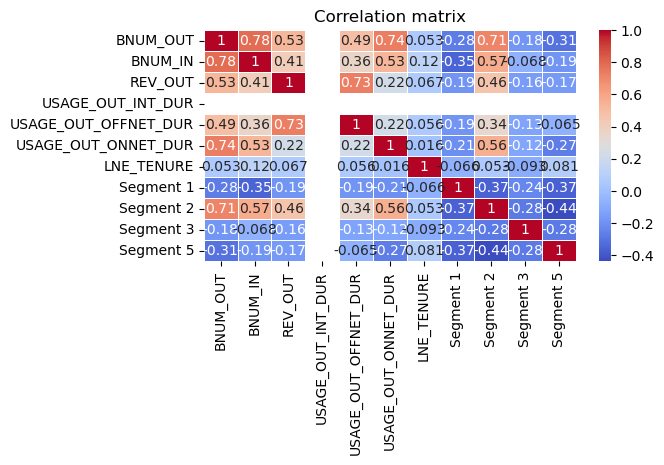

In [27]:
numerical_data = X_train
corr_matrix = numerical_data.corr()

plt.figure(figsize = (6,3))
sn.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation matrix')
plt.show()
# no multicollinearity

#### Creating and fitting Logistic regression model on the training set

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', random_state = 0)

model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

##### Predicting CHURN variable 

In [29]:
y_pred = model.predict(X_test)
y_pred[:20]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [30]:
# probabilities for the target variable 0 - remains customer, 1 - leaves the company
model.predict_proba(X_test)[:20]

array([[1.44520052e-03, 9.98554799e-01],
       [9.99123221e-01, 8.76779134e-04],
       [9.98288491e-01, 1.71150880e-03],
       [8.27586203e-04, 9.99172414e-01],
       [9.99188965e-01, 8.11035386e-04],
       [9.98409417e-01, 1.59058309e-03],
       [9.96551293e-01, 3.44870711e-03],
       [9.92689674e-01, 7.31032597e-03],
       [2.05871415e-03, 9.97941286e-01],
       [9.97629246e-01, 2.37075427e-03],
       [1.30686146e-03, 9.98693139e-01],
       [9.98170458e-01, 1.82954250e-03],
       [9.98311927e-01, 1.68807282e-03],
       [9.98341023e-01, 1.65897711e-03],
       [1.16207142e-03, 9.98837929e-01],
       [1.28173750e-03, 9.98718263e-01],
       [9.91131398e-01, 8.86860205e-03],
       [1.68625535e-03, 9.98313745e-01],
       [9.97308534e-01, 2.69146551e-03],
       [9.97598388e-01, 2.40161154e-03]])

##### Checking for accuracy of the created model

In [32]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred) * 100

print('Model accuracy score: {0:0.4f}'.format(acc_score))

Model accuracy score: 99.6739


##### Checking overfitting of the model

In [34]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

# values are identical therefore there is no overfitting

Training set score: 0.9992
Test set score: 0.9967


##### Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[703   0]
 [  3 214]]

True Positives(TP) =  703

True Negatives(TN) =  214

False Positives(FP) =  0

False Negatives(FN) =  3


<Axes: >

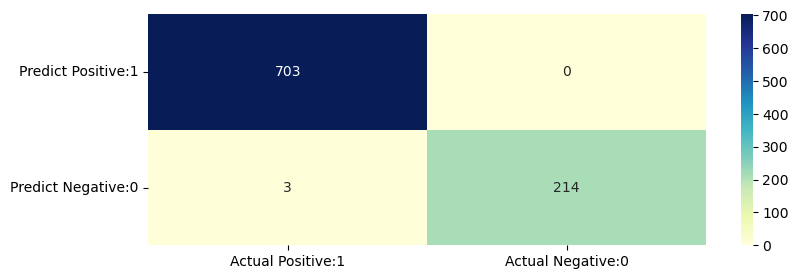

In [41]:
plt.figure(figsize=(9,3))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##### Evaluating classification metrics

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      0.99      0.99       217

    accuracy                           1.00       920
   macro avg       1.00      0.99      1.00       920
weighted avg       1.00      1.00      1.00       920



#### Classification accuracy and classification error

In [43]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN) *  100
classification_error = (FP + FN) / float(TP + TN + FP + FN) * 100

print('Classification accuracy : {0:0.3f}%'.format(classification_accuracy))
print('Classification error : {0:0.3f}%'.format(classification_error))

Classification accuracy : 99.674%
Classification error : 0.326%


##### Precision score (0 is positive class - customer hasn't left the company)

In [45]:
precision = TP / float(TP+FN) * 100
print('Precision : {0:0.3f}%'.format(precision))

# Only for 3 customers we have falsely predicted they would stay in the company, in reality they have left

Precision : 99.575%


##### Recall score (0 is positive class - customer hasn't left the company)

In [44]:
recall = TP / float(TP + FP) * 100
print('Recall or Sensitivity : {0:0.3f}%'.format(recall))

# For all customers that have stayed in the company, we have predicted that they would

Recall or Sensitivity : 100.000%


#### ROC curve

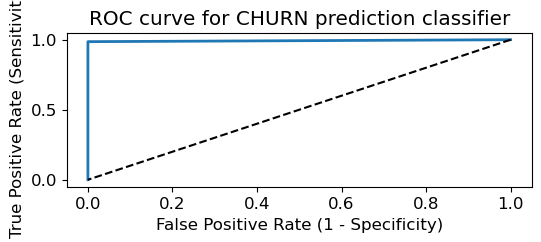

In [60]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

plt.figure(figsize=(6,2))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('ROC curve for CHURN prediction classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

##### AUC (Area Under Curve)

In [61]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9931
